# Assignment: Data Wrangling
### `! git clone https://github.com/ds3001f25/wrangling_assignment.git`
### Do Q1 and Q2
### Reading material: `tidy_data.pdf`

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture `./data/justice_data.parquet`, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [4]:
#Q1.1
import pandas as pd
import numpy as np

#Loading the airbnb dataframe
airbnb_df = pd.read_csv('/content/DS3002/a1 - wrangling data/airbnb_hw.csv')

#Cleaning the 'Price' column
#Removing '$' and ',' characters
airbnb_df['Price'] = airbnb_df['Price'].astype(str).str.replace('$', '').str.replace(',', '')

#Converting to numeric, coercing errors to NaN
airbnb_df['Price'] = pd.to_numeric(airbnb_df['Price'], errors='coerce')

#Counting missing values
missing_prices = airbnb_df['Price'].isnull().sum()

print(f"Number of missing values after cleaning: {missing_prices}")

#Display the first few rows with the cleaned 'Price' column
display(airbnb_df[['Price']].head())

Number of missing values after cleaning: 0


,Price
0,145
1,37
2,28
3,199
4,549


In [8]:
#Q1.2
#Loading the police use of force dataframe
mn_police_df = pd.read_csv('/content/DS3002/a1 - wrangling data/mn_police_use_of_force.csv')

#Cleaning the 'subject_injury' column
#Replacing values that are not 'Yes' or 'No' with NaN
valid_values = ['Yes', 'No']
mn_police_df.loc[~mn_police_df['subject_injury'].isin(valid_values), 'subject_injury'] = np.nan

#Counting missing values
missing_injury = mn_police_df['subject_injury'].isnull().sum()

print(f"Number of missing after cleaning: {missing_injury}")

#Finding proportion of missing values
proportion_missing = missing_injury / len(mn_police_df)
print(f"Proportion of missing in subject_injury: {proportion_missing}")

##Since this is over 3/4 of the data, we can see that there is too much missing data to draw conclusions responsibly

#Displaying the value counts of the cleaned 'subject_injury' column
display(mn_police_df['subject_injury'].value_counts(dropna=False))

#Cross-tabulating cleaned 'subject_injury' with 'force_type'
cross_tab = pd.crosstab(mn_police_df['subject_injury'], mn_police_df['force_type'], dropna=False)
print("\nCross-tab of subject_injury and force_type:")
display(cross_tab)

Number of missing after cleaning: 9848
Proportion of missing in subject_injury: 0.7619342359767892


,count
subject_injury,
NaN,9848
Yes,1631
No,1446



Cross-tab of subject_injury and force_type:


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


In [12]:
#Q1.3
#Loading justice data
justice_df = pd.read_parquet('/content/DS3002/a1 - wrangling data/justice_data.parquet')

#Cleaning WhetherDefendantWasReleasedPretrial column
#Converting to string
justice_df['WhetherDefendantWasReleasedPretrial'] = justice_df['WhetherDefendantWasReleasedPretrial'].astype(str)

#Replacing non Yes/No values with NaN
justice_df['WhetherDefendantWasReleasedPretrial'] = justice_df['WhetherDefendantWasReleasedPretrial'].replace(['nan', 'None'], np.nan)

#Displaying value counts
display(justice_df['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False))

#Displaying missing values
missing_pretrial_release = justice_df['WhetherDefendantWasReleasedPretrial'].isnull().sum()
print(f"Number of missing values after cleaning: {missing_pretrial_release}")

,count
WhetherDefendantWasReleasedPretrial,
1,19154
0,3801
9,31


Number of missing values after cleaning: 0


In [16]:
#Q1.4
#Cleaning the ImposedSentenceAllChargeInContactEvent column

#Just to see what they look like
display(justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts(dropna=False))
display(justice_df['ImposedSentenceAllChargeInContactEvent'].value_counts(dropna=False))

#Identifying rows with no sentence (so like dismissed and acquitted would have no imposed sentence since there WAS no sentence)
no_sentence_conditions = [
    justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'].isna(),
    justice_df['SentenceTypeAllChargesAtConvictionInContactEvent'].isin(['Dismissed', 'Acquitted', 'No Sentence Imposed'])]

#Combining the conditions with concat
no_sentence_1 = pd.concat(no_sentence_conditions, axis=1).any(axis=1)

#Filling missing sentence values with 0
justice_df.loc[no_sentence_1, 'ImposedSentenceAllChargeInContactEvent'] = justice_df.loc[no_sentence_1, 'ImposedSentenceAllChargeInContactEvent'].fillna(0)

#Replacing remaining missing values with np.nan
justice_df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(justice_df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

#Displaying value counts and missing values
#From this I am guessing that the number is about the amount of time given out at sentencing maybe!
display(justice_df['ImposedSentenceAllChargeInContactEvent'].value_counts(dropna=False))

missing_imposed_sentence = justice_df['ImposedSentenceAllChargeInContactEvent'].isnull().sum()
print(f"\nNumber of missing values after cleaning: {missing_imposed_sentence}")

,count
SentenceTypeAllChargesAtConvictionInContactEvent,
4,8779
0,8720
1,4299
2,914
9,274


,count
ImposedSentenceAllChargeInContactEvent,
NaN,9053
0.000000,4953
12.000000,1404
0.985626,1051
6.000000,809
...,...
11.905544,1
35.006160,1
46.624230,1


,count
ImposedSentenceAllChargeInContactEvent,
NaN,9053
0.000000,4953
12.000000,1404
0.985626,1051
6.000000,809
...,...
11.905544,1
35.006160,1
46.624230,1



Number of missing values after cleaning: 9053


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks (Hint: `GSAF5.xls`).

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [27]:
#Q2
import pandas as pd

#Opening the shark attack file using pandas Q2.1
shark_attacks_df = pd.read_excel('/content/DS3002/a1 - wrangling data/GSAF5.xls')

#Displaying the first few rows to confirm it's loaded Q2.1
display(shark_attacks_df.head())

#Dropping the colums without data Q2.2
#Using columns= fixes it to focus just on columns
shark_attacks_df = shark_attacks_df.drop(columns=['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'])

#Displaying the cleaned table Q2.2
display(shark_attacks_df.head())

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,...,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,...,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,...,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,...,Suspected Great White,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,...,Undetermined,Kevin McMurray Trackingsharks.com: NY Post,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Fatal Y/N,Time,Species,Source
0,16th August 2025,2025.0,Provoked,USA,Florida,Cayo Costa Boca Grande,Fishing,Shawn Meuse,M,?,Laceration to right leg below the knee,N,1055 hrs,Lemon shark 1.8 m (6ft),Johannes Marchand: Kevin McMurray Trackingshar...
1,18th August,2025.0,Unprovoked,Australia,NSW,Cabarita Beach,Surfing,Brad Ross,M,?,None sustained board severly damaged,N,0730hrs,5m (16.5ft) Great White,Bob Myatt GSAF The Guardian: 9 News: ABS News:...
2,17th August,2025.0,Unprovoked,Bahamas,Atlantic Ocean near Big Grand Cay,North of Grand Bahama near Freeport,Spearfishing,Not stated,M,63,Severe injuries no detail,N,1300hrs,Undetermined,Ralph Collier GSAF and Kevin MCMurray Tracking...
3,7th August,2025.0,Unprovoked,Australia,NSW,Tathra Beach,Surfing,Bowie Daley,M,9,None sustained board severely damaged,N,1630hrs,Suspected Great White,Bob Myatt GSAF
4,1st August,2025.0,Unprovoked,Puerto Rico,Carolina,Carolina Beach,Wading,Eleonora Boi,F,39,Bite to thigh area,N,Not stated,Undetermined,Kevin McMurray Trackingsharks.com: NY Post


In [34]:
#Cleaning the Year variable Q2.3
#Converting the Year column to numeric and int from float or text (whatever it was), and coercing errors to NaN then dropping them
shark_attacks_df['Year'] = pd.to_numeric(shark_attacks_df['Year'], errors='coerce')
shark_attacks_df.dropna(subset=['Year'], inplace=True)
shark_attacks_df['Year'] = shark_attacks_df['Year'].astype(int)

#Filtering the rows to focus on attacks since 1940 Q2.3
attacks_since_1940 = shark_attacks_df[shark_attacks_df['Year'] >= 1940].copy()

#Analyzing if attacks are increasing, decreasing, or remaining constant over time Q2.3
#Group by year and count the number of attacks
attacks_by_year = attacks_since_1940['Year'].value_counts().sort_index()

#Displaying each decade (every 10 years) to try to see a trend

display(attacks_by_year[attacks_by_year.index.isin(range(attacks_by_year.index.min(), attacks_by_year.index.max() + 1, 10))])
#It looks like they go up and down, but have increased since the 2000s

,count
Year,
1940,24
1950,43
1960,93
1970,42
1980,36
1990,39
2000,97
2010,101
2020,101


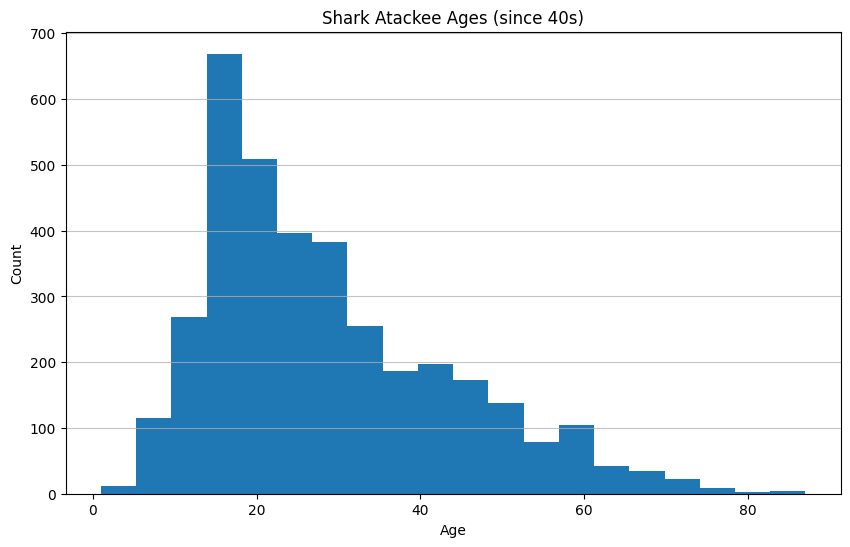

In [40]:
#Q2.4
#Converting 'Age' column to numeric
attacks_since_1940['Age'] = pd.to_numeric(attacks_since_1940['Age'], errors='coerce')

#Dropping rows where 'Age' is NaN
attacks_since_1940.dropna(subset=['Age'], inplace=True)

#Converting 'Age' to integer type
attacks_since_1940['Age'] = attacks_since_1940['Age'].astype(int)

#Making a histogram of ages (had to look up how to do this) Q2.4
import matplotlib.pyplot as plot

plot.figure(figsize=(10, 6))
plot.hist(attacks_since_1940['Age'], bins=20)
plot.title('Shark Atackee Ages (since 40s)')
plot.xlabel('Age')
plot.ylabel('Count')
plot.grid(axis='y', alpha=0.75)
plot.show()

In [52]:
#Q2.5
#Replacing non M/F values with NaN
valid_sex_values = ['M', 'F']
attacks_since_1940.loc[~attacks_since_1940['Sex'].isin(valid_sex_values), 'Sex'] = np.nan

#Calculating proportion of male victims
#Getting value counts of cleaned Sex column
sex_counts = attacks_since_1940['Sex'].value_counts(dropna=False)

#Total non-missing sex entries
total_non_missing_sex = sex_counts.get('M', 0) + sex_counts.get('F', 0)

#Getting count of male victims
male_count = sex_counts.get('M', 0)

#Calculating proportion of male victims
proportion_male = male_count / total_non_missing_sex

print(f"Proportion of male victims: {proportion_male}")

#Displaying value counts
display(sex_counts)

Proportion of male victims: 0.84


,count
Sex,
M,3009
F,558
NaN,33


In [58]:
#Q2.6
#Getting value counts to see unique values
display(attacks_since_1940['Type'].value_counts(dropna=False))

#Setting values to 'Provoked', 'Unprovoked', or 'Unknown' (all weird/nondescriptive ones are set to unknown)

reset_variables = {
    'Provoked': 'Provoked',
    'Unprovoked': 'Unprovoked',
    'Boat': 'Unknown',
    'Sea Disaster': 'Unknown',
    'Invalid': 'Unknown',
    'Questionable': 'Unknown',
    'Boating': 'Unknown'
}

#Applying the the reset variables
#Handling NaNs by filling with 'Unknown'
attacks_since_1940['newlist'] = attacks_since_1940['Type'].map(reset_variables).fillna('Unknown')

#Getting value counts of cleaned Type column
display(attacks_since_1940['newlist'].value_counts(dropna=False))

#Calculating proportion of unprovoked attacks
type_counts_cleaned = attacks_since_1940['newlist'].value_counts()
unprovoked_count = type_counts_cleaned.get('Unprovoked', 0)
total_attacks = type_counts_cleaned.sum()

proportion_unprovoked = unprovoked_count / total_attacks


print(f"\nProportion of unprovoked attacks: {proportion_unprovoked}")

,count
Type,
Unprovoked,2993
Provoked,292
Invalid,205
Watercraft,41
Sea Disaster,38
Questionable,19
NaN,9
unprovoked,1
?,1


,count
newlist,
Unprovoked,2993
Unknown,315
Provoked,292



Proportion of unprovoked attacks: 0.8313888888888888


In [64]:
#Q2.7
#Getting value counts to see unique values
display(attacks_since_1940['Fatal Y/N'].value_counts(dropna=False))

#Setting values to 'Y', 'N', or 'Unknown'
#Based on value counts, 'Y', 'N', and NaN are the primary values.
#We can map 'UNKNOWN' to 'Unknown' and handle NaNs by filling with 'Unknown'.
fatal_reset = {
    'Y': 'Y',
    'N': 'N',
    'UNKNOWN': 'Unknown'
}

#Applying the mapping, keeping 'Y' and 'N' as they are, and mapping others
#Handling NaNs by filling with 'Unknown'
attacks_since_1940['newlist'] = attacks_since_1940['Fatal Y/N'].map(fatal_reset).fillna('Unknown')

#Getting value counts of cleaned Fatal Y/N column
display(attacks_since_1940['newlist'].value_counts(dropna=False))

,count
Fatal Y/N,
N,2849
Y,529
NaN,201
UNKNOWN,9
N,6
F,4
2017,1
M,1


,count
newlist,
N,2849
Y,529
Unknown,222


In [68]:
#Q2.8
#Are sharks more likely to launch unprovoked attacks on men or women?
unprovoked_sex_crosstab = pd.crosstab(attacks_since_1940['Type_cleaned'], attacks_since_1940['Sex'])
unprovoked_sex_proportion = pd.crosstab(attacks_since_1940['Type_cleaned'], attacks_since_1940['Sex'], normalize='columns')
display(unprovoked_sex_proportion)

#Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
provoked_fatal_crosstab = pd.crosstab(attacks_since_1940['Type_cleaned'], attacks_since_1940['Fatal_cleaned'])
provoked_fatal_proportion = pd.crosstab(attacks_since_1940['Type_cleaned'], attacks_since_1940['Fatal_cleaned'], normalize='index')
display(provoked_fatal_proportion)

# Is it more or less likely to be fatal when the victim is male or female?
sex_fatal_crosstab = pd.crosstab(attacks_since_1940['Sex'], attacks_since_1940['Fatal_cleaned'])
sex_fatal_proportion = pd.crosstab(attacks_since_1940['Sex'], attacks_since_1940['Fatal_cleaned'], normalize='index')
display(sex_fatal_proportion)

# I do not really like sharks, I have even seen a shark attack before! It was very very scary and there is a lot of blood. Most sharks I do think are harmless though, and I do not support hunting sharks.

Sex,F,M
Type_cleaned,,
Provoked,0.037634,0.088401
Unknown,0.087814,0.086740
Unprovoked,0.874552,0.824859


Fatal_cleaned,N,Unknown,Y
Type_cleaned,,,
Provoked,0.958904,0.013699,0.027397
Unknown,0.279365,0.619048,0.101587
Unprovoked,0.828934,0.007685,0.163381


Fatal_cleaned,N,Unknown,Y
Sex,,,
F,0.801075,0.064516,0.134409
M,0.790960,0.060485,0.148554


In [74]:
#Q2.9
#Filtering for white (and great white because theyre both white sharks) sharks then calculating their proportion
white_sharks = attacks_since_1940[attacks_since_1940['Species '].isin(['White shark', 'Great White'])].copy()

proportion_white_shark = len(white_sharks) / len(attacks_since_1940.dropna(subset=['Species ']))
print(f"Proportion of confirmed white shark attacks: {proportion_white_shark}")

Proportion of confirmed white shark attacks: 0.04644226672347678
